<a href="https://colab.research.google.com/github/anjaanii/Clustering/blob/main/Clustering_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Clustering**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>**

2. Documentation on Pycaret-Clustering: **<a href="https://pycaret.readthedocs.io/en/latest/api/clustering.html"> Click Here </a>**

---


### **(a) Install Pycaret**

In [2]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [ ]:
from pycaret.utils import version
version()

'3.2.0'

---
# **1. Clustering - Part 1 (Kmean Clustering)**
---
### **1.1 Get the list of datasets available in pycaret (55)**

In [19]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "jewellery" dataset**
---

In [21]:
juiceDataSet = get_data("juice")    # SN is 14
# This is unsupervised dataset.
# No target is defined.

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


---
### **1.3 Download the "jewellery" dataset to local system**
---

In [22]:
juiceDataSet.to_csv("juiceDataSet.csv")
from google.colab import files
#files.download('juiceDataSet.csv')

  ---
### **1.4 "Parameter setting"  for clustering model**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [23]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(juiceDataSet)
# Re-run the code if any error occur

,Description,Value
0,Session id,5587
1,Original data shape,"(1070, 19)"
2,Transformed data shape,"(1070, 19)"
3,Ordinal features,2
4,Numeric features,17
5,Categorical features,2
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


---
### **1.5 Building "KMean" clustering model**
---

In [24]:
KMeanClusteringModel = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,5116.4872,0.5218,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **1.6 Assign Model - "Assign the labels" to the dataset**
---



In [25]:
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Cluster
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,Cluster 3
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,Cluster 3
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,Cluster 3
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,Cluster 3
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0,Cluster 0
1066,1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,Cluster 0
1067,1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,Cluster 0
1068,1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,Cluster 0


---
### **1.7 Clustering in "Three line of code"**
---

In [26]:
from pycaret.clustering import *

kMeanClusteringParameters = setup(juiceDataSet, verbose=False)
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,5116.4872,0.5218,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Cluster
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,Cluster 2
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,Cluster 2
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,Cluster 2
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,Cluster 2
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0,Cluster 0
1066,1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,Cluster 0
1067,1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,Cluster 0
1068,1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,Cluster 0


---
### **1.8 "Saving" the result**
---



In [27]:
kMeanPrediction.to_csv("KMeanResult.csv")
print("Result file save sucessfully!!")

Result file save sucessfully!!


---
### **1.9 Download the "result file" to user local system**
---

In [28]:
from google.colab import files
#files.download('KMeanResult.csv')      # Uncomment this line
# Open and Explore result file (KMeanResult.csv).

---
# **2. Clustering: Saving and Loading the Model**
---
### **2.1 Save the "trained model"**
---

In [29]:
x = save_model(KMeanClusteringModel, 'kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Saved


---
### **2.2 Download the "trained model**
---

In [31]:
from google.colab import files
files.download('kMeanClusteringModelFile.pkl')      # Uncomment this line

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **2.3 Load the model**
---
##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine

In [32]:
KMeanClusteringModel1 = load_model('kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Loaded


---
### **2.4 Upload and Load the trained model to "Colab Environment"**
---
##### **Upload the trained model**

In [33]:
from google.colab import files
files.upload()                     # Uncomment this line

Saving kMeanClusteringModelFile.pkl to kMeanClusteringModelFile (1).pkl


{'kMeanClusteringModelFile (1).pkl': b'\x80\x04\x953\x02\x00\x00\x00\x00\x00\x00\x8c\x19pycaret.internal.pipeline\x94\x8c\x08Pipeline\x94\x93\x94)\x81\x94}\x94(\x8c\x05steps\x94]\x94(\x8c\x11numerical_imputer\x94\x8c(pycaret.internal.preprocess.transformers\x94\x8c\x12TransformerWrapper\x94\x93\x94)\x81\x94}\x94(\x8c\x0btransformer\x94\x8c\x14sklearn.impute._base\x94\x8c\rSimpleImputer\x94\x93\x94)\x81\x94}\x94(\x8c\x0emissing_values\x94G\x7f\xf8\x00\x00\x00\x00\x00\x00\x8c\radd_indicator\x94\x89\x8c\x13keep_empty_features\x94\x89\x8c\x08strategy\x94\x8c\x04mean\x94\x8c\nfill_value\x94N\x8c\x07verbose\x94\x8c\ndeprecated\x94\x8c\x04copy\x94\x88\x8c\x11feature_names_in_\x94\x8c\x13joblib.numpy_pickle\x94\x8c\x11NumpyArrayWrapper\x94\x93\x94)\x81\x94}\x94(\x8c\x08subclass\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94\x8c\x05shape\x94K\x11\x85\x94\x8c\x05order\x94\x8c\x01C\x94\x8c\x05dtype\x94h#h*\x93\x94\x8c\x02O8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01|\x94NNNJ\xff\xff\xff\xffJ\xff\xff

##### **Load the trained model**

In [34]:
KMeanClusteringModel1 = load_model('kMeanClusteringModelFile (1)')

Transformation Pipeline and Model Successfully Loaded


---
# **3. Clustering: Cluster the new dataset (Unseen Data)**
---
### **3.1 Select some data or upload user dataset file**

In [35]:
# Select top 10 rows
newData = get_data("juice").iloc[:10]

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


---
### **3.2 Make prediction on the new dataset (Unseen Data)**
---

In [36]:
newPredictions = predict_model(KMeanClusteringModel, data = newData)
newPredictions

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Cluster
0,1.0,0.0,237.0,1.0,1.75,1.99,0.00,0.0,0.0,0.0,0.500000,1.99,1.75,0.24,0.0,0.000000,0.000000,0.24,1.0,Cluster 2
1,2.0,0.0,239.0,1.0,1.75,1.99,0.00,0.3,0.0,1.0,0.600000,1.69,1.75,-0.06,0.0,0.150754,0.000000,0.24,1.0,Cluster 2
2,3.0,0.0,245.0,1.0,1.86,2.09,0.17,0.0,0.0,0.0,0.680000,2.09,1.69,0.40,0.0,0.000000,0.091398,0.23,1.0,Cluster 2
3,4.0,1.0,227.0,1.0,1.69,1.69,0.00,0.0,0.0,0.0,0.400000,1.69,1.69,0.00,0.0,0.000000,0.000000,0.00,1.0,Cluster 2
4,5.0,0.0,228.0,7.0,1.69,1.69,0.00,0.0,0.0,0.0,0.956535,1.69,1.69,0.00,1.0,0.000000,0.000000,0.00,0.0,Cluster 2
5,6.0,0.0,230.0,7.0,1.69,1.99,0.00,0.0,0.0,1.0,0.965228,1.99,1.69,0.30,1.0,0.000000,0.000000,0.30,0.0,Cluster 2
6,7.0,0.0,232.0,7.0,1.69,1.99,0.00,0.4,1.0,1.0,0.972182,1.59,1.69,-0.10,1.0,0.201005,0.000000,0.30,0.0,Cluster 2
7,8.0,0.0,234.0,7.0,1.75,1.99,0.00,0.4,1.0,0.0,0.977746,1.59,1.75,-0.16,1.0,0.201005,0.000000,0.24,0.0,Cluster 2
8,9.0,0.0,235.0,7.0,1.75,1.99,0.00,0.4,0.0,0.0,0.982197,1.59,1.75,-0.16,1.0,0.201005,0.000000,0.24,0.0,Cluster 2
9,10.0,0.0,238.0,7.0,1.75,1.99,0.00,0.4,0.0,0.0,0.985757,1.59,1.75,-0.16,1.0,0.201005,0.000000,0.24,0.0,Cluster 2


---
### **3.3 Save the prediction result to csv**
---

In [37]:
newPredictions.to_csv("NewPredictions.csv")
print("Result file save sucessfully!!")

Result file save sucessfully!!


---
# **4. Clustering: Ploting the Cluster**
---
```
- Cluster PCA Plot (2d)          'cluster'
- Cluster TSnE (3d)              'tsne'
- Elbow Plot                     'elbow'
- Silhouette Plot                'silhouette'
- Distance Plot                  'distance'
- Distribution Plot              'distribution'
```

---
### **4.1 Evaluate Cluster Model**
---

In [38]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

---
### **4.2 2D-plot for Cluster**
---

In [39]:
plot_model(KMeanClusteringModel, plot='cluster')

---
### **4.3 3D-plot for Cluster**
---

In [40]:
plot_model(KMeanClusteringModel, plot = 'tsne')

---
### **4.4 Elbow Plot**
---

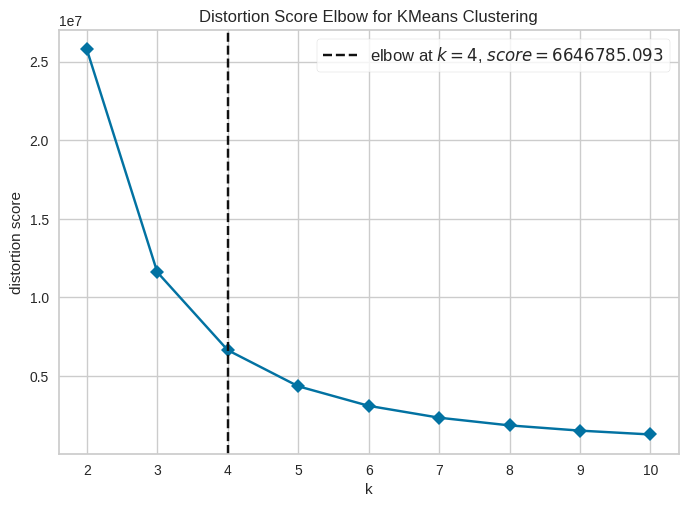

In [41]:
plot_model(KMeanClusteringModel, plot = 'elbow')

---
### **4.5 Silhouette Plot**
---

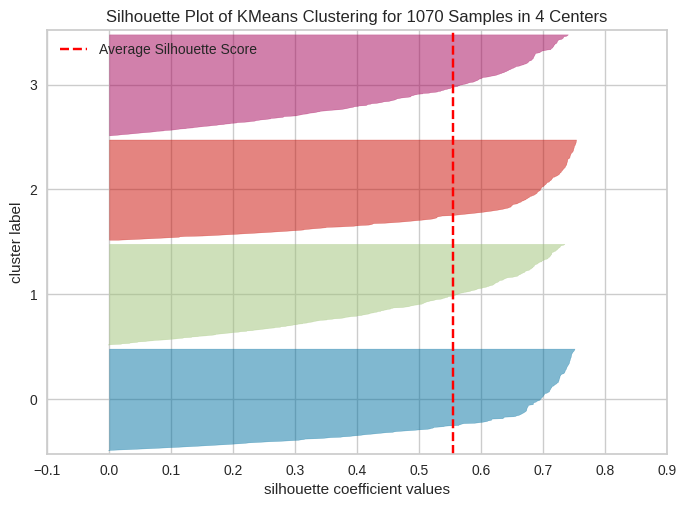

In [42]:
plot_model(KMeanClusteringModel, plot = 'silhouette')

---
### **4.6 Distribution Plot**
---

In [43]:
plot_model(KMeanClusteringModel, plot = 'distribution')

---
### **4.7 Distance Plot**
---

In [45]:
#plot_model(KMeanClusteringModel, plot = 'distance') # Rerun the code

---
# **5. Compelete Code for Clustering (KMean)**
---
### **5.1 For Cluster = 3, 4, 5, 6**

In [46]:
from pycaret.datasets import get_data
from pycaret.clustering import *

juiceDataSet = get_data('juice', verbose=False)
setup(data = juiceDataSet, verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5792,4169.7999,0.5132,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,5116.4872,0.5218,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5364,6000.5967,0.5326,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5216,6810.6933,0.5432,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **5.2 Other Clustering Algorithms**
---
```
- K-Means clustering                 'kmeans'
- Affinity Propagation               'ap'
- Mean shift clustering              'meanshift'
- Spectral Clustering                'sc'
- Agglomerative Clustering           'hclust'
- Density-Based Spatial Clustering   'dbscan'
- OPTICS Clustering                  'optics'
- Birch Clustering                   'birch'
- K-Modes clustering                 'kmodes'
```

---
# **6. Clustering: Apply "Data Preprocessing"**
---
### **Read the Dataset**

In [47]:
from pycaret.clustering import *
from pycaret.datasets import get_data

juiceDataSet = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


---
### **6.1 Model Performance using "Normalization"**
---
### **6.1.1 Elbow Plot**


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2718,275.2286,1.4577,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

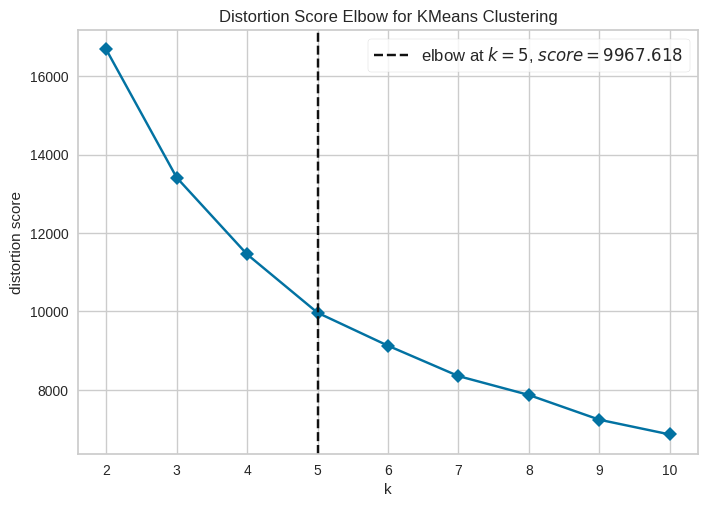

In [48]:
setup(data = juiceDataSet, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.1.2 Evaluation parameters for Cluster = 3, 4, 5, 6**
---

In [49]:
setup(data = juiceDataSet, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2718,275.0649,1.5851,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2709,275.2426,1.4627,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2684,276.7947,1.3266,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2404,261.2347,1.4166,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.1.3 3D Plot for Cluster = 5**
---

In [50]:
setup(data = juiceDataSet, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2684,276.7947,1.3266,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.2 Model Performance using "Transformation"**
---

### **6.2.1 Elbow Plot**


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5795,5804.8940,0.5160,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

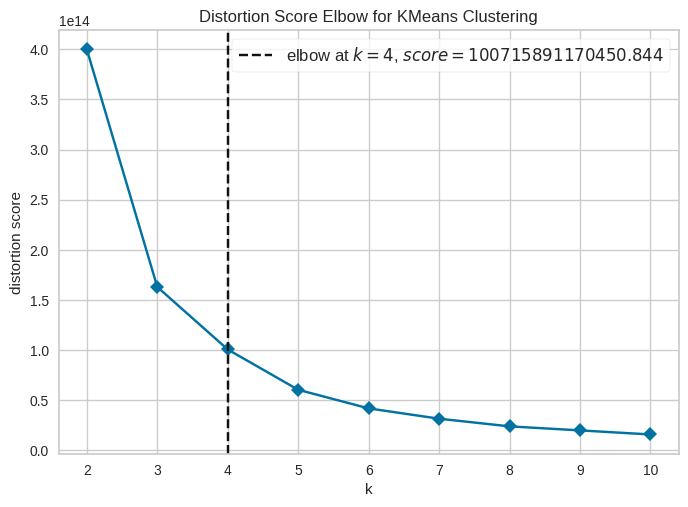

In [51]:
setup(data = juiceDataSet, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.2.2 Evaluation parameters for Cluster = 3, 4, 5, 6**
---

In [52]:
setup(data = juiceDataSet, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6235,5179.0654,0.4770,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5795,5804.8940,0.5160,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5775,7401.6164,0.5026,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5725,8720.3786,0.5000,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.3 Model Performance using "PCA"**
---
### **6.3.1 Elbow Plot**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,5116.4872,0.5218,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

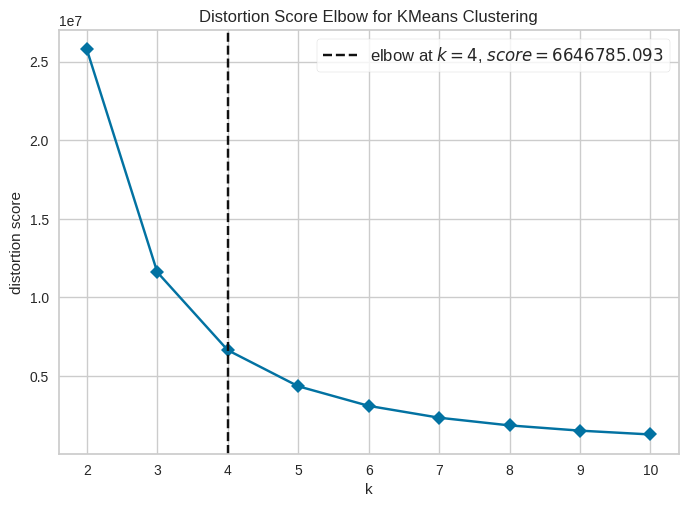

In [53]:
setup(data = juiceDataSet, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.3.2 Evaluation parameters for Cluster = 3, 4, 5, 6**
---

In [54]:
setup(data = juiceDataSet, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5792,4169.8519,0.5132,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,5116.4872,0.5218,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5364,6000.4876,0.5326,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5212,6811.1940,0.5435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.4 Model Performance using "Transformation" + "Normalization"**
---
### **6.4.1 Elbow Plot**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2186,224.4923,1.6050,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

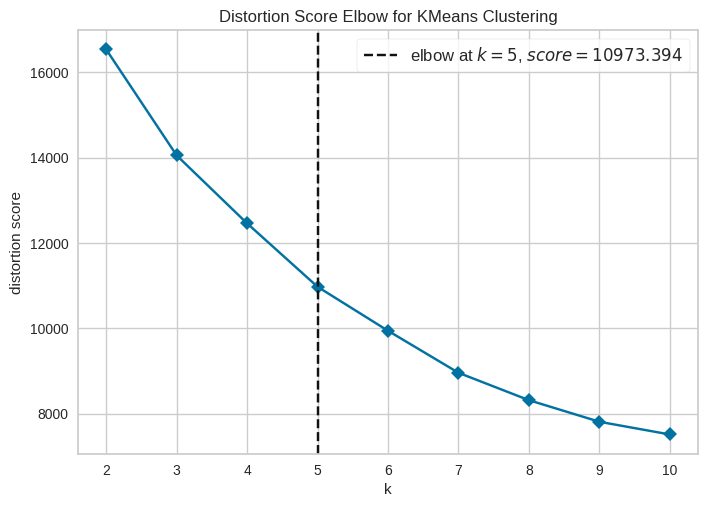

In [55]:
setup(data = juiceDataSet, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.4.2 Evaluation parameters for Cluster = 3, 4, 5, 6**
---

In [56]:
setup(data = juiceDataSet, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2309,238.4355,1.6513,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2119,233.1581,1.5329,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2401,227.0850,1.4452,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2511,221.5159,1.4010,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **6.5 Model Performance using "Transformation" + "Normalization" + "PCA"**
---
### **6.5.1 Elbow Plot**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2119,233.1581,1.5329,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

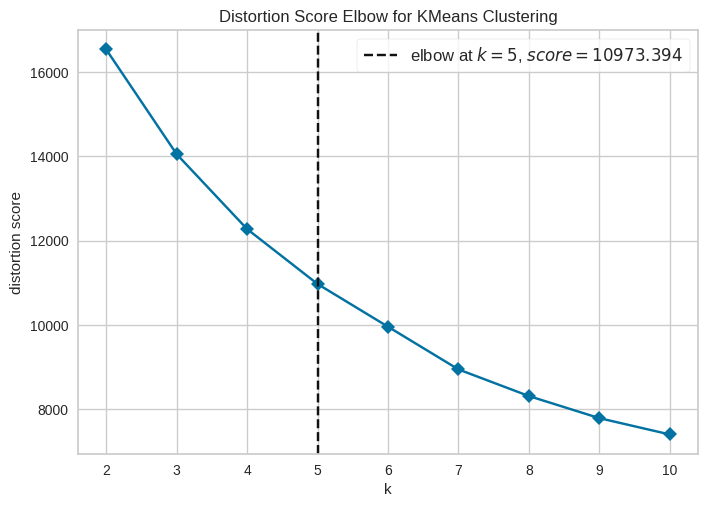

In [57]:
setup(data = juiceDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

---
### **6.5.2 Evaluation parameters for Cluster = 3, 4, 5, 6**
---

In [58]:
setup(data = juiceDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2309,238.4355,1.6513,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2119,233.1581,1.5329,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2401,227.0850,1.4452,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2424,219.9768,1.4381,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
# **7. Other Clustering Techniques**
---
```
K-Means clustering                 'kmeans'
Affinity Propagation               'ap'
Mean shift clustering              'meanshift'
Spectral Clustering                'sc'
Agglomerative Clustering           'hclust'
Density-Based Spatial Clustering   'dbscan'
OPTICS Clustering                  'optics'
Birch Clustering                   'birch'
K-Modes clustering                 'kmodes'
```

---
### **7.1 Buildign Agglomerative (Hierarchical) clustering model**
---

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5338,4586.5636,0.5243,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

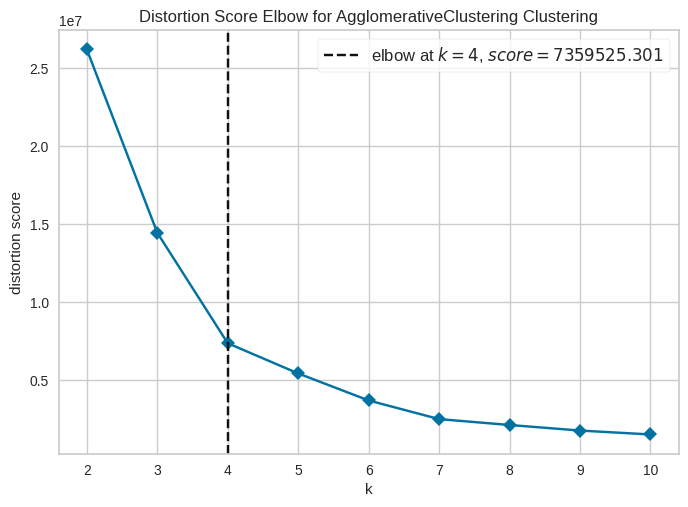

In [59]:
from pycaret.datasets import get_data
from pycaret.clustering import *

juiceDataSet = get_data('juice', verbose=False)
setup(data = juiceDataSet, verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

---
### **7.1.1 Assign Model - "Assign the labels" to the dataset**
---



In [60]:
hierarchicalModel = create_model('hclust', num_clusters=3)
hierarchicalModelPrediction = assign_model(hierarchicalModel)
hierarchicalModelPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5495,3247.0182,0.5176,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Cluster
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,Cluster 2
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,Cluster 2
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,Cluster 2
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,Cluster 2
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0,Cluster 0
1066,1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,Cluster 0
1067,1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,Cluster 0
1068,1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,Cluster 0


---
### **7.1.2 Evaluate Agglomerative (Hierarchical) Clustering**
---

In [61]:
evaluate_model(hierarchicalModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

---
### **7.2 Density-Based Spatial Clustering**
---

In [62]:
from pycaret.datasets import get_data
from pycaret.clustering import *

juiceDataSet = get_data('juice', verbose=False)
setup(data = juiceDataSet, verbose=False)
dbscanModel = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

---
### **7.2.1 Assign Model - "Assign the labels" to the dataset**
---



In [63]:
dbscanModelPrediction = assign_model(dbscanModel)
dbscanModelPrediction

# Noisy samples are given the label -1 i.e. 'Cluster -1'

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Cluster
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,Cluster -1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,Cluster -1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,Cluster -1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,Cluster -1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,Cluster -1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0,Cluster -1
1066,1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,Cluster -1
1067,1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,Cluster -1
1068,1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,Cluster -1


### **Key Points**

- num_clusters not required for some of the clustering Alorithms (Affinity Propagation ('ap'), Mean shift
  clustering ('meanshift'), Density-Based Spatial Clustering ('dbscan') and OPTICS Clustering ('optics')).
- num_clusters param for these models are automatically determined.

- When fit doesn't converge in Affinity Propagation ('ap') model, all datapoints are labelled as -1.

- Noisy samples are given the label -1, when using Density-Based Spatial  ('dbscan') or OPTICS Clustering ('optics').

- OPTICS ('optics') clustering may take longer training times on large datasets.


---
# **8. Deploy the model on AWS**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/clustering.html#pycaret.clustering.deploy_model">Click Here</a>**